# Introduction to NLP

In [2]:

# load books collection which is part of nltk
from nltk.book import *

print(text7.tokens[:100])


['Pierre', 'Vinken', ',', '61', 'years', 'old', ',', 'will', 'join', 'the', 'board', 'as', 'a', 'nonexecutive', 'director', 'Nov.', '29', '.', 'Mr.', 'Vinken', 'is', 'chairman', 'of', 'Elsevier', 'N.V.', ',', 'the', 'Dutch', 'publishing', 'group', '.', 'Rudolph', 'Agnew', ',', '55', 'years', 'old', 'and', 'former', 'chairman', 'of', 'Consolidated', 'Gold', 'Fields', 'PLC', ',', 'was', 'named', '*-1', 'a', 'nonexecutive', 'director', 'of', 'this', 'British', 'industrial', 'conglomerate', '.', 'A', 'form', 'of', 'asbestos', 'once', 'used', '*', '*', 'to', 'make', 'Kent', 'cigarette', 'filters', 'has', 'caused', 'a', 'high', 'percentage', 'of', 'cancer', 'deaths', 'among', 'a', 'group', 'of', 'workers', 'exposed', '*', 'to', 'it', 'more', 'than', '30', 'years', 'ago', ',', 'researchers', 'reported', '0', '*T*-1', '.', 'The']


In [7]:
# or open some text file
# pg174.txt is the project gutenberg version of the book "The Picture of Dorian Gray"
# if you don't have the local version, use the code below to download it

with open('pg174.txt', encoding = 'utf-8') as open_file:
    raw = open_file.read()
    
# how many characters has the raw string?
print (len(raw))


453169


In [8]:
# Alternative way of downloading the book "The picture of Dorian Gray"

#from urllib import request

#url = "http://www.gutenberg.org/cache/epub/174/pg174.txt"
#response = request.urlopen(url)
#raw = response.read().decode('utf8')


# Tokenization

Tokenize the raw string into sentences and words

In [14]:
import nltk
from nltk.tokenize import sent_tokenize, word_tokenize

sentences = sent_tokenize(raw)
tokens = word_tokenize(raw)

print("Number of sentences:", len(sentences))
print("Number of tokens:", len(tokens))
print("Number of types:", len(set(tokens)))
print("Type-token-ratio:", len(set(tokens))/len(tokens))



text = nltk.Text(tokens)

Number of sentences: 6632
Number of tokens: 98722
Number of types: 8070
Type-token-ratio 0.08174469723060716


In [15]:
# output some sample sentences
sentences[20:30]

['No artist has\nethical sympathies.',
 'An ethical sympathy in an artist is an\nunpardonable mannerism of style.',
 'No artist is ever morbid.',
 'The artist\ncan express everything.',
 'Thought and language are to the artist\ninstruments of an art.',
 'Vice and virtue are to the artist materials for\nan art.',
 'From the point of view of form, the type of all the arts is\nthe art of the musician.',
 "From the point of view of feeling, the\nactor's craft is the type.",
 'All art is at once surface and symbol.',
 'Those who go beneath the surface do so at their peril.']

In [44]:
# output some sample tokens
print(tokens[200:250])




['ugly', 'meanings', 'in', 'beautiful', 'things', 'are', 'corrupt', 'without', 'being', 'charming', '.', 'This', 'is', 'a', 'fault', '.', 'Those', 'who', 'find', 'beautiful', 'meanings', 'in', 'beautiful', 'things', 'are', 'the', 'cultivated', '.', 'For', 'these', 'there', 'is', 'hope', '.', 'They', 'are', 'the', 'elect', 'to', 'whom', 'beautiful', 'things', 'mean', 'only', 'beauty', '.', 'There', 'is', 'no', 'such']


## N-grams

In [53]:
from pprint import pprint
from nltk.util import bigrams, ngrams

bg = bigrams(tokens[200:250])
tg = ngrams(tokens[200:250], 3)

pprint(list(bg)[0:15])
print()
pprint(list(tg)[0:15])



[('ugly', 'meanings'),
 ('meanings', 'in'),
 ('in', 'beautiful'),
 ('beautiful', 'things'),
 ('things', 'are'),
 ('are', 'corrupt'),
 ('corrupt', 'without'),
 ('without', 'being'),
 ('being', 'charming'),
 ('charming', '.'),
 ('.', 'This'),
 ('This', 'is'),
 ('is', 'a'),
 ('a', 'fault'),
 ('fault', '.')]

[('ugly', 'meanings', 'in'),
 ('meanings', 'in', 'beautiful'),
 ('in', 'beautiful', 'things'),
 ('beautiful', 'things', 'are'),
 ('things', 'are', 'corrupt'),
 ('are', 'corrupt', 'without'),
 ('corrupt', 'without', 'being'),
 ('without', 'being', 'charming'),
 ('being', 'charming', '.'),
 ('charming', '.', 'This'),
 ('.', 'This', 'is'),
 ('This', 'is', 'a'),
 ('is', 'a', 'fault'),
 ('a', 'fault', '.'),
 ('fault', '.', 'Those')]


## Stopwords

In [63]:
from nltk.corpus import stopwords
print(stopwords.words('english')[0:10])

filtered = [token for token in tokens[0:30] if token.lower() not in stopwords.words('english')]

print()
print(tokens[0:30])
print()
print(filtered[0:30])

      

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', 'your']

['\ufeffThe', 'Project', 'Gutenberg', 'EBook', 'of', 'The', 'Picture', 'of', 'Dorian', 'Gray', ',', 'by', 'Oscar', 'Wilde', 'This', 'eBook', 'is', 'for', 'the', 'use', 'of', 'anyone', 'anywhere', 'at', 'no', 'cost', 'and', 'with', 'almost', 'no']

['\ufeffThe', 'Project', 'Gutenberg', 'EBook', 'Picture', 'Dorian', 'Gray', ',', 'Oscar', 'Wilde', 'eBook', 'use', 'anyone', 'anywhere', 'cost', 'almost']


## Language Detection

In [19]:

from nltk.corpus import stopwords

def simple_lang_detection(tokens):
    ''''Compute per language included in nltk number of unique stopwords appearing in analyzed text'''
    languages_ratios = {}
    for language in stopwords.fileids():
        stopwords_set = set(stopwords.words(language))
        words_set = set(tokens)
        common_elements = words_set.intersection(stopwords_set)
        languages_ratios[language] = len(common_elements) # language "score"
        
    most_rated_language = max(languages_ratios, key=languages_ratios.get)

    print(most_rated_language)

simple_lang_detection(tokens)
simple_lang_detection(word_tokenize('Ich mag das nicht.'))


english
german


### 50 Most common words

In [20]:
fdist = nltk.FreqDist(text)
print (fdist.most_common(50))

[('.', 5693), (',', 5543), ('the', 3510), ('of', 2251), ('and', 2149), ('to', 2084), ('I', 1693), ('a', 1620), ("''", 1576), ('``', 1520), ('that', 1297), ('in', 1203), ('you', 1139), ('was', 1066), ('he', 1044), ('it', 974), ('his', 935), ('is', 924), ('had', 823), ('with', 695), ('him', 661), ('?', 574), ('for', 571), ('have', 557), ('at', 546), ('me', 522), ('not', 512), ('as', 502), ('He', 499), ('be', 469), ('The', 422), ('Dorian', 418), ('her', 405), ("n't", 401), ('one', 394), ('!', 390), ('are', 386), ('It', 384), ('do', 370), ('You', 368), ('on', 355), ('would', 307), ('all', 287), ('she', 273), ('or', 270), ('what', 265), ('said', 262), ('from', 255), ('were', 248), ('Lord', 245)]


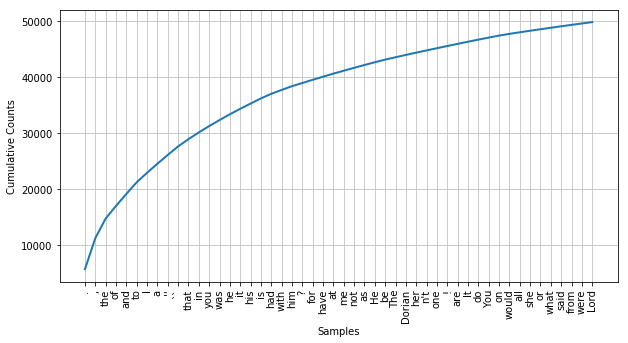

In [21]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 5))

fdist.plot(50, cumulative=True)

More than a half of the tokens (50000 from 98722) are words or symbols without meaning

In [24]:
from nltk.book import text1
print("text1 is:", text1.name)

fdist1 = nltk.FreqDist(text1)
print(fdist1.most_common(50))

text1 is: Moby Dick by Herman Melville 1851
[(',', 18713), ('the', 13721), ('.', 6862), ('of', 6536), ('and', 6024), ('a', 4569), ('to', 4542), (';', 4072), ('in', 3916), ('that', 2982), ("'", 2684), ('-', 2552), ('his', 2459), ('it', 2209), ('I', 2124), ('s', 1739), ('is', 1695), ('he', 1661), ('with', 1659), ('was', 1632), ('as', 1620), ('"', 1478), ('all', 1462), ('for', 1414), ('this', 1280), ('!', 1269), ('at', 1231), ('by', 1137), ('but', 1113), ('not', 1103), ('--', 1070), ('him', 1058), ('from', 1052), ('be', 1030), ('on', 1005), ('so', 918), ('whale', 906), ('one', 889), ('you', 841), ('had', 767), ('have', 760), ('there', 715), ('But', 705), ('or', 697), ('were', 680), ('now', 646), ('which', 640), ('?', 637), ('me', 627), ('like', 624)]


50 most common words in both books are mostly the same. And it's difficult to find out the topic of either book based on these lists.

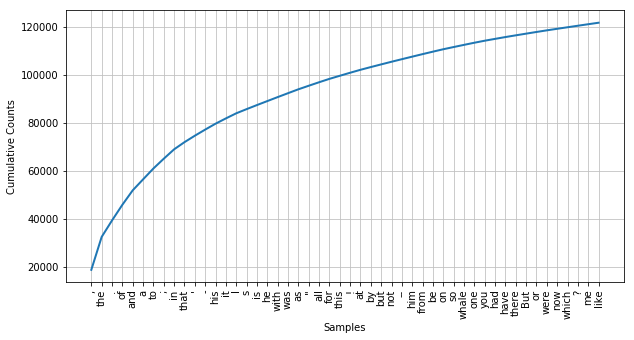

In [25]:
plt.figure(figsize=(10, 5))

fdist1.plot(50, cumulative=True)

And again almost a half of the tokens (120000 from 260819) are words and symbols without meaning.

### Remove stopwords

In [26]:
from nltk.corpus import stopwords

def remove_stopwords(words):
    words = [w.lower() for w in words if w.lower() not in stopwords.words('english') and w.isalpha()]
    return words

In [27]:
text_without_stopwords = nltk.Text(remove_stopwords(text.tokens))

text1_without_stopwords = nltk.Text(remove_stopwords(text1.tokens))

FreqDist for The picture of Dorian Gray

In [29]:
fdist_0 = nltk.FreqDist(text_without_stopwords)
print (fdist_0.most_common(50))

[('one', 429), ('dorian', 420), ('would', 312), ('said', 262), ('lord', 248), ('henry', 233), ('life', 229), ('like', 210), ('gray', 205), ('man', 178), ('harry', 177), ('know', 177), ('never', 176), ('must', 168), ('basil', 157), ('could', 140), ('things', 129), ('think', 127), ('something', 126), ('see', 125), ('come', 124), ('us', 122), ('thing', 120), ('seemed', 119), ('go', 115), ('always', 110), ('love', 110), ('made', 109), ('eyes', 109), ('quite', 107), ('face', 107), ('good', 107), ('time', 106), ('want', 105), ('people', 104), ('really', 103), ('away', 102), ('back', 100), ('came', 99), ('say', 97), ('cried', 95), ('looked', 94), ('nothing', 93), ('tell', 93), ('much', 92), ('world', 92), ('look', 91), ('work', 89), ('hallward', 89), ('project', 88)]


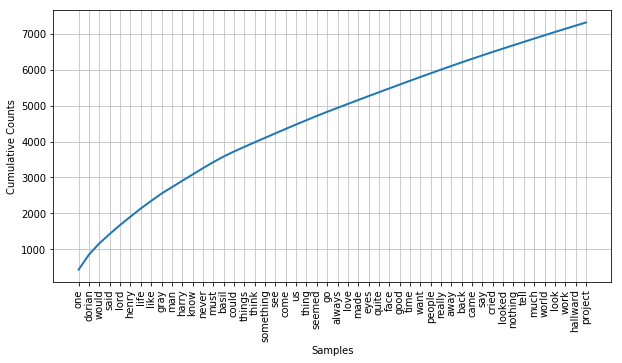

In [30]:
plt.figure(figsize=(10, 5))
fdist_0.plot(50, cumulative=True)

FreqDist for Moby Dick

In [26]:
fdist1_0 = nltk.FreqDist(text1_without_stopwords)
print (fdist1_0.most_common(50))

[('whale', 1226), ('one', 921), ('like', 647), ('upon', 566), ('man', 527), ('ship', 518), ('ahab', 511), ('ye', 472), ('sea', 455), ('old', 450), ('would', 432), ('though', 384), ('head', 345), ('yet', 345), ('boat', 336), ('time', 334), ('long', 333), ('captain', 329), ('still', 312), ('great', 306), ('said', 304), ('two', 298), ('must', 283), ('seemed', 283), ('white', 281), ('last', 277), ('see', 272), ('thou', 271), ('way', 271), ('whales', 268), ('stubb', 257), ('queequeg', 252), ('little', 249), ('round', 247), ('three', 245), ('men', 244), ('say', 244), ('sperm', 244), ('may', 240), ('first', 235), ('every', 232), ('well', 230), ('us', 228), ('much', 223), ('good', 216), ('could', 216), ('hand', 214), ('side', 208), ('never', 206), ('ever', 206)]


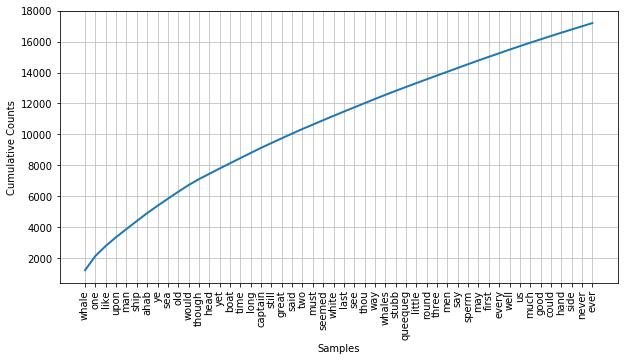

In [25]:
plt.figure(figsize=(10, 5))
fdist1_0.plot(50, cumulative=True)

Now we have different lists of most common words for these books.

# Some more operations

In [31]:
text1.concordance("monstrous")

Displaying 11 of 11 matches:
ong the former , one was of a most monstrous size . ... This came towards us , 
ON OF THE PSALMS . " Touching that monstrous bulk of the whale or ork we have r
ll over with a heathenish array of monstrous clubs and spears . Some were thick
d as you gazed , and wondered what monstrous cannibal and savage could ever hav
that has survived the flood ; most monstrous and most mountainous ! That Himmal
they might scout at Moby Dick as a monstrous fable , or still worse and more de
th of Radney .'" CHAPTER 55 Of the Monstrous Pictures of Whales . I shall ere l
ing Scenes . In connexion with the monstrous pictures of whales , I am strongly
ere to enter upon those still more monstrous stories of them which are to be fo
ght have been rummaged out of this monstrous cabinet there is no telling . But 
of Whale - Bones ; for Whales of a monstrous size are oftentimes cast up dead u


In [33]:
text1.similar('big')

good large white smaller middle direful stubborn wealthy curious thin
black this dashed hardy innocent frequent reliable delegated wooden
closely


Inaugural Address Corpus


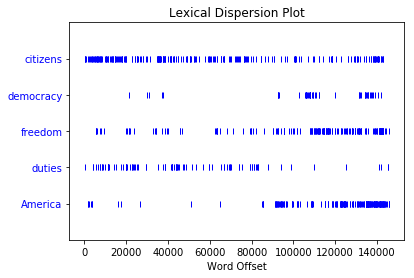

In [38]:
# Inaugural Address from first American President until now
print(text4.name)
text4.dispersion_plot(["citizens", "democracy",
"freedom", "duties", "America"])


## Pos Tagging

When you have the part of speech tags, you can example use it to:
* Simply filter the tokens that have a specific part of speech, eg verbs
* If you look for noun-phrases, you can filter for allowed patterns
* Etc

In [53]:
text = word_tokenize("And now for something completely different. He goes.")
nltk.pos_tag(text)


[('And', 'CC'),
 ('now', 'RB'),
 ('for', 'IN'),
 ('something', 'NN'),
 ('completely', 'RB'),
 ('different', 'JJ'),
 ('.', '.'),
 ('He', 'PRP'),
 ('goes', 'VBZ'),
 ('.', '.')]

## Normalization

**Lemmatization:** word converted to its base form -- eg using a dictionary.

**Stemming:** similar, but here we cut of the word ending to generate a base form.

In [39]:
from nltk.stem import WordNetLemmatizer
wordnet_lemmatizer = WordNetLemmatizer()

text = word_tokenize("He walks on snowy streets.")

tokens_norm = [wordnet_lemmatizer.lemmatize(w) for w in text]

print(text)
print(tokens_norm)


['He', 'walks', 'on', 'snowy', 'streets', '.']
['He', 'walk', 'on', 'snowy', 'street', '.']


In [61]:
from nltk.stem.porter import PorterStemmer

text = word_tokenize("He studies computer science.")

stemmer = PorterStemmer()
text_stemmed = [stemmer.stem(word) for word in text]
print(text_stemmed)

['He', 'studi', 'comput', 'scienc', '.']


# Word Embeddings

### Training a model from a text file

In [64]:
import gensim
from gensim.models.word2vec import LineSentence

def train_model(sentences):
    return gensim.models.Word2Vec(sentences, min_count=5, size=300, workers=4, window=10, sg=1, negative=5)

sentences = LineSentence('./pg174.txt')
model = train_model(sentences)

print(model)


Word2Vec(vocab=1818, size=300, alpha=0.025)


In [72]:
print (model.most_similar("Dorian"))
print (model.most_similar("like"))

[('Gray', 0.9472713470458984), ('Henry', 0.9439978003501892), ('looked', 0.9110049605369568), ('at', 0.9066075682640076), ('looking', 0.9047166109085083), ('up', 0.896975576877594), ('down', 0.8903647065162659), ('Gray,', 0.8886219263076782), ('shook', 0.8823114037513733), ('Hallward', 0.881176233291626)]
[('make', 0.9968989491462708), ('makes', 0.9964326620101929), ('use', 0.9957423210144043), ('was.', 0.9948611259460449), ('where', 0.9948370456695557), ('seems', 0.9946221113204956), ('take', 0.9944865107536316), ('our', 0.9944047927856445), ('less', 0.9943320155143738), ('for', 0.9942882657051086)]


### Loading a model

In [80]:
from gensim.models.keyedvectors import KeyedVectors
model = KeyedVectors.load_word2vec_format('asoif_fastText.model', binary=False)  # C binary format
print (model)

In [81]:
model.most_similar("Jaime")

[('Lannister', 0.5232412815093994),
 ('Brienne', 0.5049344897270203),
 ('Cersei', 0.4496692419052124),
 ('Tywin', 0.44807204604148865),
 ('Genna', 0.44112324714660645),
 ('Tyrion', 0.4257636070251465),
 ('wench', 0.42303740978240967),
 ('Kingslayer', 0.4206944704055786),
 ('Cleos', 0.4172479510307312),
 ('Daven', 0.4143018126487732)]

In [84]:
model.most_similar("dragon")

[('dragons', 0.4927164912223816),
 ('dragonfire', 0.4611809253692627),
 ('dragonlords', 0.43502527475357056),
 ('Vhagar', 0.4172027111053467),
 ('Viserys', 0.4055444300174713),
 ('Jorah', 0.39293017983436584),
 ('Viserion', 0.39286375045776367),
 ('Rhaegal', 0.39054450392723083),
 ('translucent', 0.38806435465812683),
 ('eggs', 0.38746559619903564)]

In [87]:
model.doesnt_match(['Cersei', 'Arya', 'Tyrion', 'Jaime'])

'Arya'

In [88]:
model.doesnt_match(['Cersei', 'dragons', 'Tyrion', 'Jaime'])

'dragons'

### word-embeddings: Analogies

In [89]:
# the famous: man is king what woman is to ???
# man:king ::: woman:X

model.most_similar(positive=['woman', 'king'], negative=['man'])

[('queen', 0.4083746671676636),
 ('rightly', 0.33623605966567993),
 ('Joffrey', 0.3314247131347656),
 ('BARATHEON', 0.3289687931537628),
 ('Sansa', 0.3225705325603485),
 ('Cersei', 0.321939080953598),
 ('councillor', 0.3171345591545105),
 ('council', 0.31476521492004395),
 ('Margaery', 0.31349804997444153),
 ('her', 0.3114854693412781)]

In [95]:
# Tywin:Lannister ::: Ned:X (correct=Stark)
model.most_similar(positive=['Ned', 'Lannister'], negative=['Tywin'])

# this work sometimes, but accurracy is low because:
# a) the training corpus is very small
# b) There are usually MANY relations between two words .. in the vectorspace it is all mixed together


[('Stark', 0.39824748039245605),
 ('king', 0.381863534450531),
 ('Robert', 0.38048046827316284),
 ('in', 0.37385493516921997),
 ('Littlefinger', 0.37144172191619873),
 ('Catelyn', 0.3690967857837677),
 ('Sansa', 0.3536754846572876),
 ('Barristan', 0.3377428948879242),
 ('Jon', 0.3306949734687805),
 ('on', 0.32745784521102905)]

### Visualize a model

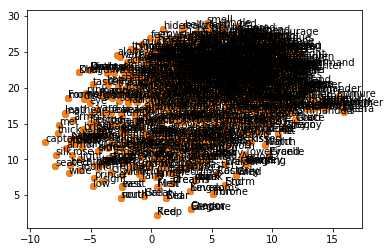

In [101]:
import sys
import codecs
import numpy as np
import matplotlib.pyplot as plt

from sklearn.manifold import TSNE
from nltk.corpus import stopwords

def load_embeddings():

    with codecs.open('asoif_fastText-small.model', 'r', 'utf-8') as f_in:
        vocabulary, wv = zip(*[line.strip().split(' ', 1) for line in f_in 
                               if line.split(" ")[0] not in stopwords.words('english')])
    wv = np.loadtxt(wv)
    return wv, vocabulary


def main(num_words=1000):

    # set of names used in the book


    wv, vocabulary = load_embeddings()

    tsne = TSNE(n_components=2, random_state=0)
    np.set_printoptions(suppress=True)
    Y = tsne.fit_transform(wv[:num_words,:])

    plt.scatter(Y[:, 0], Y[:, 1])
    for label, x, y in zip(vocabulary, Y[:, 0], Y[:, 1]):
        plt.annotate(label, xy=(x, y), xytext=(0, 0), textcoords='offset points')
    #plt.savefig("/tmp/b.svg")
    plt.show()
    
main(num_words=1000)





### showing a screenshot of a small part of the visualization

<img src="snip.png"> 

# Spacy

In [68]:
import spacy
nlp = spacy.load('en')

# analyse a document with the model
doc = nlp(u'This is a sentence.')


OSError: Can't find model 'en'

### some operations in spacy

* entities
* semantic similarity (with word vectors)
* integration in deep learning

In [71]:
## open a book 
text = open('pg174.txt').read()
doc = nlp(text)

# Find named entities, phrases and concepts
for entity in doc.ents:
    print(entity.text, entity.label_)

# Determine semantic similarities
doc1 = nlp(u'the fries were gross')
doc2 = nlp(u'worst fries ever')
doc1.similarity(doc2)

# Hook in your own deep learning models
nlp.add_pipe(load_my_model(), before='parser')


NameError: name 'nlp' is not defined

### Display entities

In [72]:
from spacy import displacy

doc_ent = nlp(u'When Sebastian Thrun started working on self-driving cars at Google '
              u'in 2007, few people outside of the company took him seriously.')

displacy.serve(doc_ent, style='ent')


NameError: name 'nlp' is not defined

In [ ]:
doc = nlp(u"Apple and banana are similar. 
            Pasta and hippo aren't.")

apple = doc[0]
banana = doc[2]
pasta = doc[6]
hippo = doc[8]

assert apple.similarity(banana) > pasta.similarity(hippo)
assert apple.has_vector, banana.has_vector, pasta.has_vector, hippo.has_vector
